In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load data

train = pd.read_csv("titanic/train.csv")
test = pd.read_csv("titanic/test.csv")

In [4]:
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [5]:
test.columns.values

array(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [11]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


<AxesSubplot:>

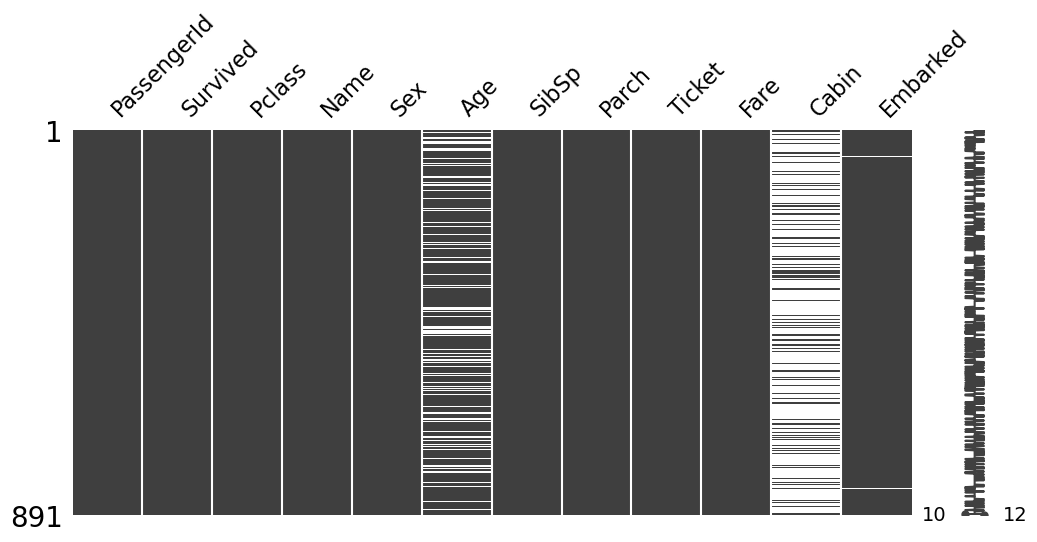

In [12]:
import missingno as msno
msno.matrix(train, figsize=(12, 5))

In [13]:
# EDA

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


<AxesSubplot:ylabel='Survived'>

/Users/a.../opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/a.../opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47581 (\N{HANGUL SYLLABLE MANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/a.../opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/a.../opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51316 (\N{HANGUL SYLLABLE JON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


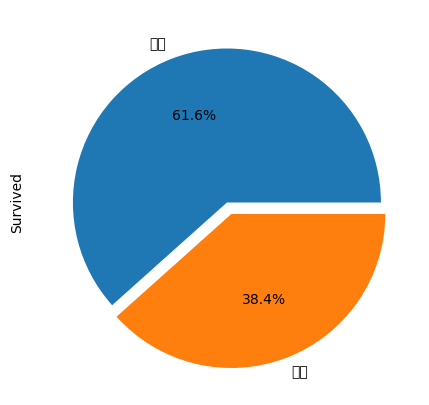

In [15]:
train['Survived'].value_counts()

plt.figure(figsize=(8, 5))
labels=['사망', '생존']
train['Survived'].value_counts().plot.pie(explode=[0, 0.08], autopct='%1.1f%%', labels=labels)

# 사망자수 > 생존자수 (생존률 38.4%)

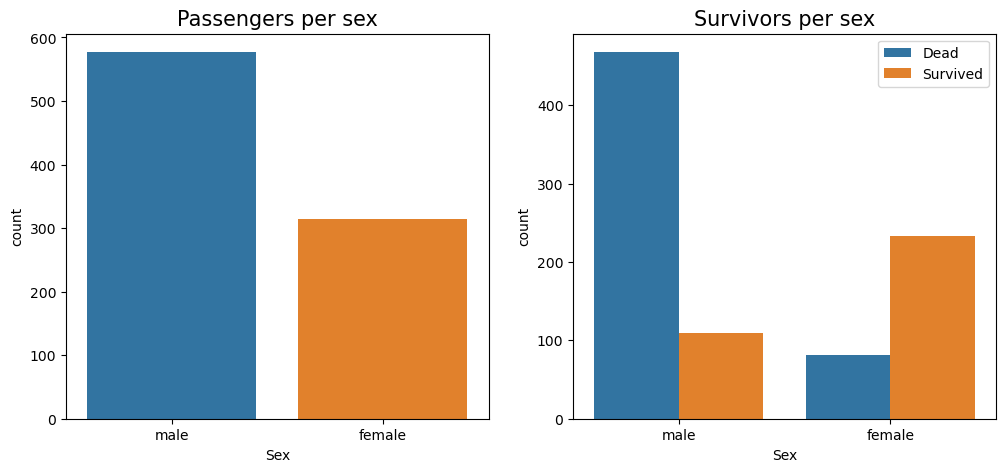

In [16]:
# 성별 별 탑승자수 / 성별 별 생존자수
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].set_title("Passengers per sex", size=15)
sns.countplot(x="Sex", data=train, ax=axes[0])

axes[1].set_title("Survivors per sex", size=15)
sns.countplot(x="Sex", hue="Survived", data=train, ax=axes[1])
axes[1].legend(labels=['Dead', 'Survived'])

# 탑승객의 비율 남자 > 여자, 생존자의 비율 남자 < 여자
# 해당 과정으로부터 성별이 생존에 중요한 영향 끼친다는 것 파악 가능

,Survived
Sex,
female,0.742038
male,0.188908


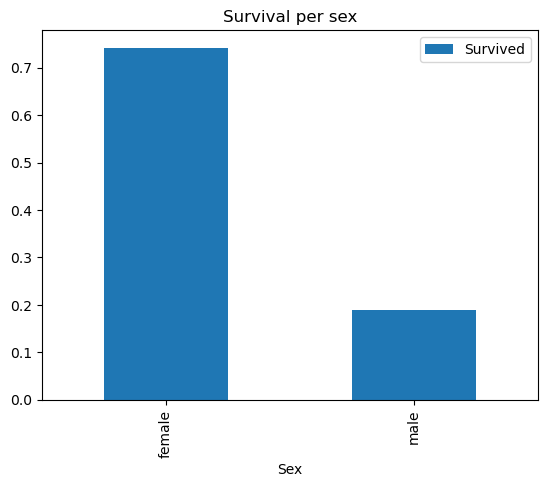

In [17]:
# 성별 생존률
sur = train[['Sex', 'Survived']].groupby('Sex').mean().plot.bar()
sur.set_title('Survival per sex')
train[['Sex','Survived']].groupby('Sex').mean()

In [18]:
# 탑승 등급 별 생존률
train[['Pclass', 'Survived']].groupby('Pclass').mean()

# 높은 등급일수록 높은 생존률 보임

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


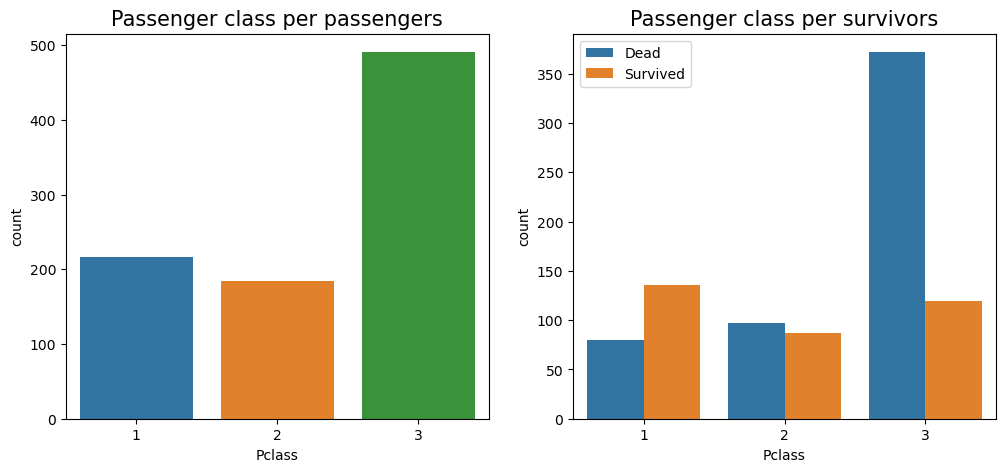

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].set_title("Passenger class per passengers", size = 15)
sns.countplot(x='Pclass', data=train, ax=axes[0])

axes[1].set_title("Passenger class per survivors", size = 15)
sns.countplot(x="Pclass", hue="Survived", data=train, ax=axes[1])
axes[1].legend(labels=['Dead', 'Survived'])

# 3등석의 승객의 비중이 가장 많은 동시에 사망률도 가장 높음

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


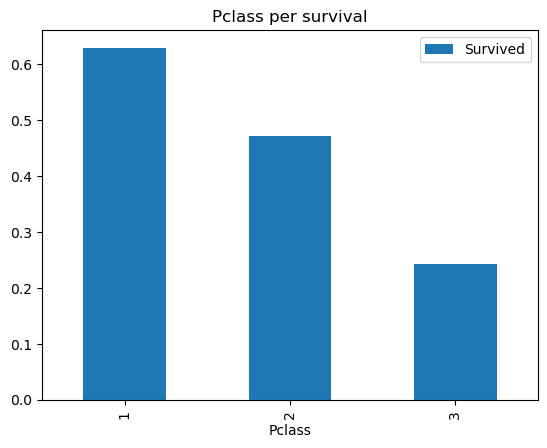

In [20]:
sur = train[['Pclass', 'Survived']].groupby('Pclass').mean().plot.bar()
sur.set_title('Pclass per survival')
train[['Pclass', 'Survived']].groupby('Pclass').mean()

# 해당 과정으로부터 탑승 등급도 생존률에 영향을 끼친다는 것 확인 가능

In [21]:
train['Age'].describe()

# 평균 나이는 약 30세

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Figure size 800x500 with 0 Axes>

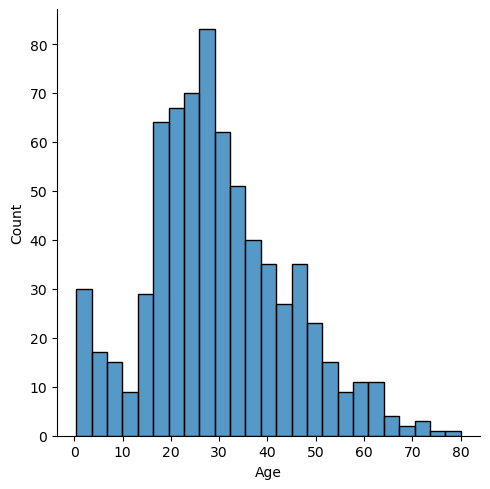

In [22]:
# 나이 분포 확인
plt.figure(figsize=(8, 5))
sns.displot(train['Age'], bins=25)

# 탑승객의 나이는 주로 20~40세에 분포

/Users/a.../opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/a.../opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

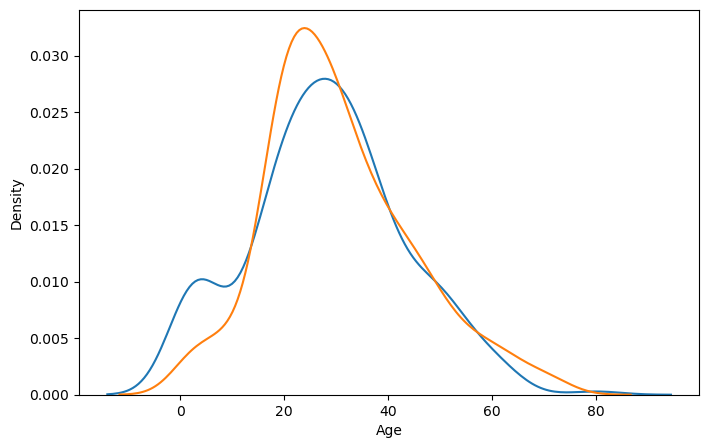

In [23]:
sur = train[train['Survived'] == 1]
dead = train[train['Survived'] == 0]

plt.figure(figsize=(8, 5))
sns.distplot(sur['Age'], bins=25, hist=False)
sns.distplot(dead['Age'], bins=25, hist=False)


# 비슷하긴 하나, 나이가 어린 승객일수록 생존률(파란색)이 높고, 2-30대의 생존률이 낮음

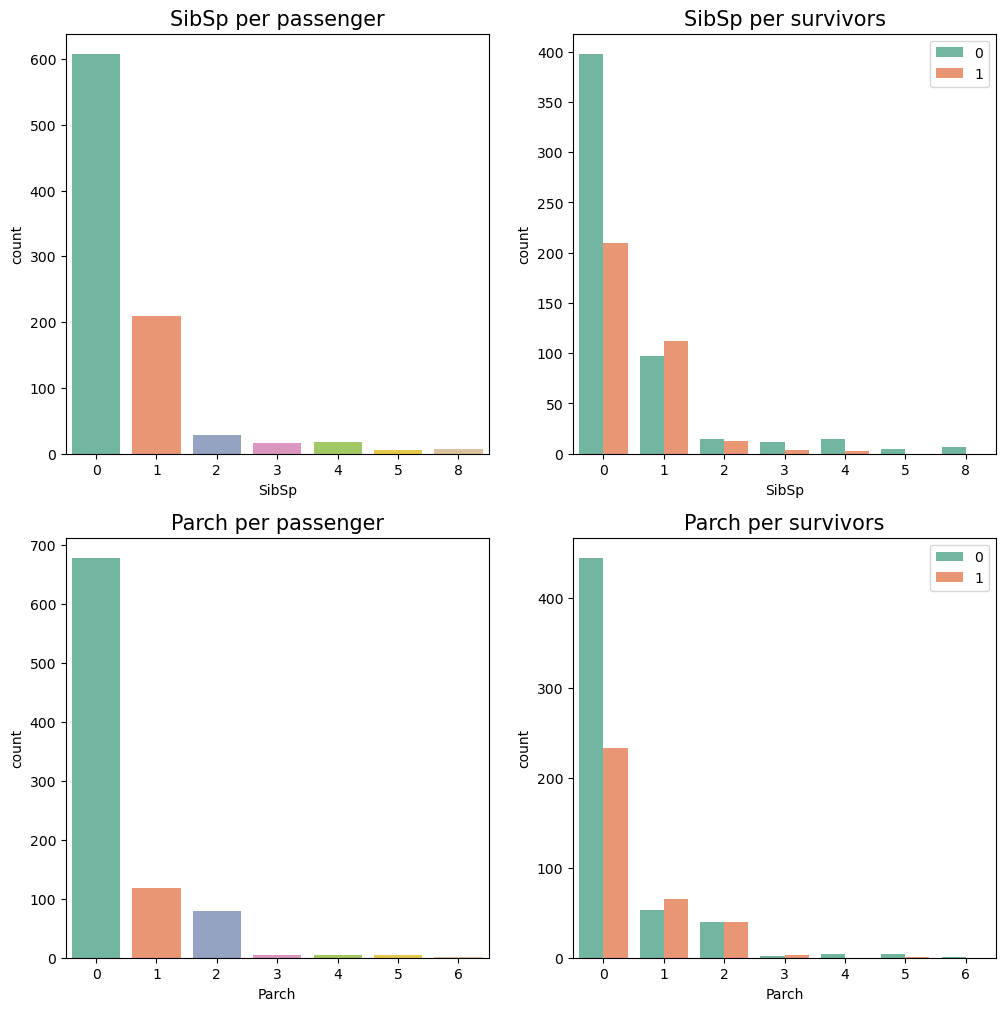

In [24]:
# 동승가족수
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

axes[0][0].set_title("SibSp per passenger", size = 15)
sns.countplot(x='SibSp', data=train, ax=axes[0][0], palette="Set2")
axes[0][1].set_title("SibSp per survivors", size = 15)
sns.countplot(x='SibSp', hue='Survived', data=train, ax=axes[0][1], palette="Set2")
axes[0][1].legend(loc='upper right')

axes[1][0].set_title("Parch per passenger", size=15)
sns.countplot(x="Parch", data=train, ax=axes[1][0], palette="Set2")
axes[1][1].set_title("Parch per survivors", size=15)
sns.countplot(x="Parch", hue="Survived", data=train, ax=axes[1][1], palette="Set2")
axes[1][1].legend(loc='upper right')

# 혼자 탑승한 탑승객일수록 사람들이 많이 사망함 -> 가족과 함께 탑승한 사람일수록 생존률이 높음

In [25]:
train[['SibSp', 'Survived']].groupby('SibSp').mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [26]:
train[['Parch', 'Survived']].groupby('Parch').mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


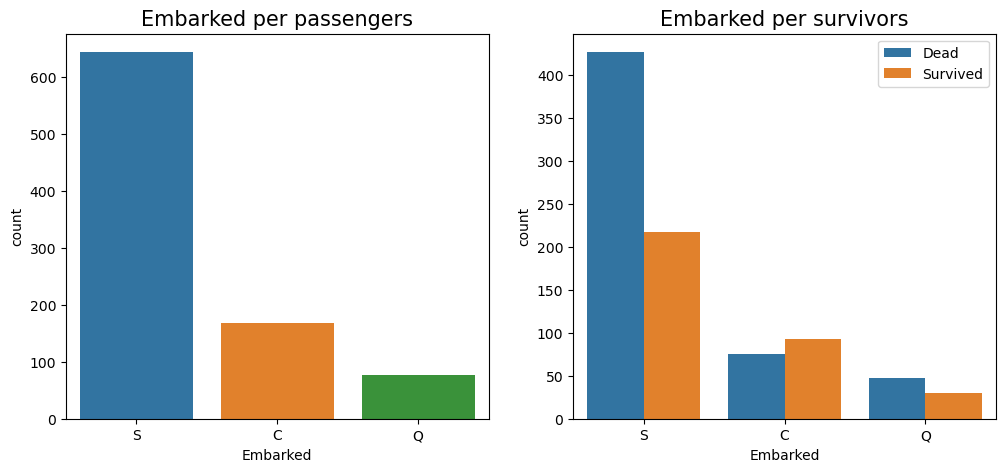

In [27]:
# 탑승 항구 별 생존률
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].set_title("Embarked per passengers", size=15)
sns.countplot(x="Embarked", data=train, ax=axes[0])

axes[1].set_title("Embarked per survivors", size=15)
sns.countplot(x="Embarked", hue="Survived", data=train, ax=axes[1])
axes[1].legend(labels=["Dead", "Survived"])

# S 탑승항구에서 탄 손님일수록 생존률 낮음, C 항구에서 탄 손님의 생존률이 높음

In [28]:
train[['Embarked', 'Survived']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


<AxesSubplot:>

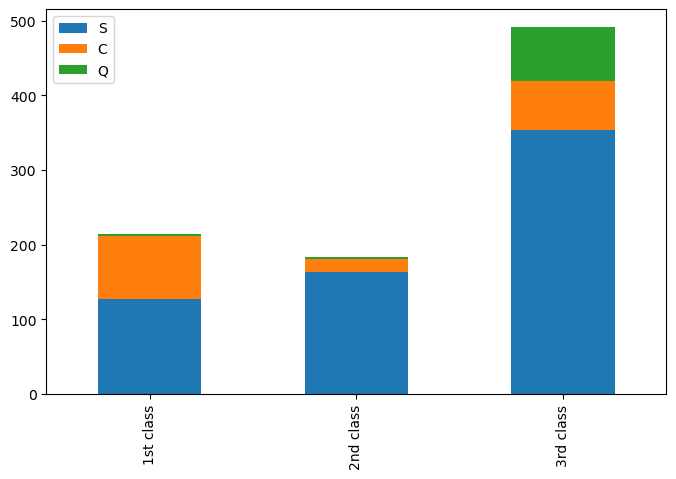

In [29]:
# 왜 항구별로 차이가 날까?
# 항구 별 티켓 클래스 확인

pc1 = train[train['Pclass']==1]['Embarked'].value_counts()
pc2 = train[train['Pclass']==2]['Embarked'].value_counts()
pc3 = train[train['Pclass']==3]['Embarked'].value_counts()

pc = pd.DataFrame([pc1, pc2, pc3])
pc.index = ['1st class', '2nd class', '3rd class']

fig, ax = plt.subplots(figsize=(8, 5))
pc.plot(kind = 'bar', stacked=True, ax = ax)

# C 항구에서의 탑승 비율은 1등석 손님이 가장 많음
# 3등석에서 S 항구 탑승객이 가장 많음

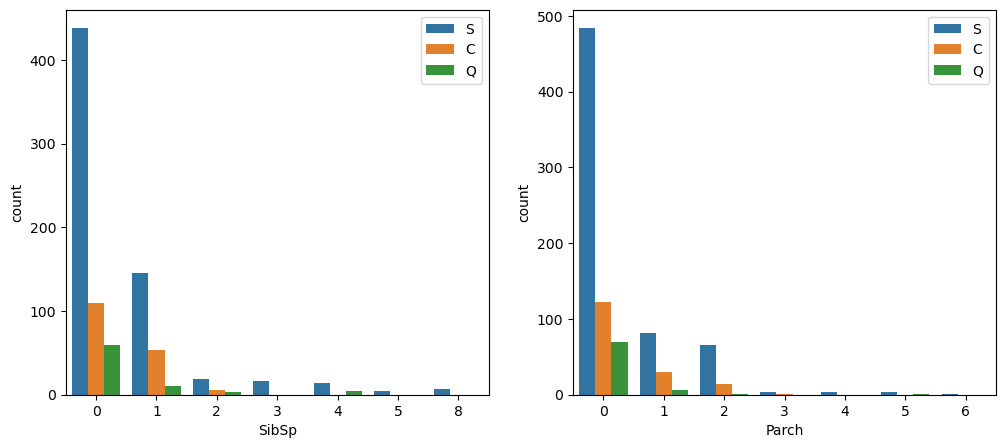

In [30]:
# 항구 별 탑승객들의 동승자 수 확인
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x='SibSp', hue='Embarked', data=train, ax=ax[0])
sns.countplot(x='Parch', hue='Embarked', data=train, ax=ax[1])
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')

# S 항구에서 혼자 탄 탑승객의 비율이 압도적으로 높음

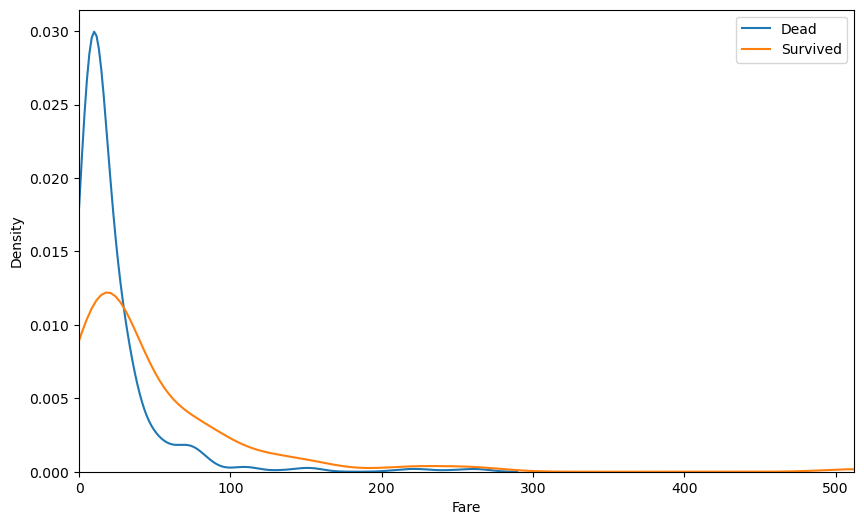

In [31]:
# 탑승 요금의 분포

fig, ax = plt.subplots(figsize=(10, 6))

# 분포 확인
sns.kdeplot(train[train['Survived']==0]['Fare'], ax=ax)
sns.kdeplot(train[train['Survived']==1]['Fare'], ax=ax)

ax.set(xlim=(0, train['Fare'].max()))
ax.legend(['Dead', 'Survived'])

# 적은 금액을 낸 사람들의 생존률이 높음
# 탑승 클래스/탑승 금액에 따라 생존 여부에 영향을 끼침


In [32]:
# Feature Engineering

train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [33]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:
data_list = [train, test]

In [35]:
# 성별 0, 1로 범주화
for data in data_list:
    data['Sex'] = data['Sex'].astype('category').cat.codes

train['Sex'].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int8

In [36]:
# 나이 결측치 -> 평균으로 채움
sex_mean = train.groupby('Sex')['Age'].mean()

In [37]:
sex_mean

Sex
0    27.915709
1    30.726645
Name: Age, dtype: float64

In [38]:
for data in data_list:
    data.loc[(data['Sex']==0) & (data['Age'].isnull()), 'Age'] = sex_mean[0]
    data.loc[(data['Sex']==1) & (data['Age'].isnull()), 'Age'] = sex_mean[1]

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [39]:
# Age 범주화
train['AgeRange'] = pd.cut(train['Age'], 5)
train[['AgeRange', 'Survived']].groupby('AgeRange').mean()


,Survived
AgeRange,
"(0.34, 16.336]",0.550000
"(16.336, 32.252]",0.344168
"(32.252, 48.168]",0.404255
"(48.168, 64.084]",0.434783
"(64.084, 80.0]",0.090909


In [40]:
for data in data_list:
    data.loc[data['Age'] <= 16, 'Age'] = 0
    data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
    data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
    data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
    data.loc[data['Age'] > 64, 'Age'] = 4

train.drop('AgeRange', inplace=True, axis=1)
train.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,1.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,2.0,0,0,373450,8.0500,NaN,S


In [41]:
# 이름 간소화
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [42]:
for data in data_list:
    data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    data['Title'] = data['Title'].replace(['Dr', 'Rev', 'Mlle', 'Major', 'Col', 'Countess','Capt', 'Ms', 'Sir', 'Lady', 'Mme', 'Don', 'Jonkheer'], 'Other')

    # 간소화 -> 범주형 -> 수치형
    data['Title_name'] = data['Title'].astype('category').cat.codes

In [43]:
train[['Title', 'Survived']].groupby('Title').mean()

,Survived
Title,
Master,0.575000
Miss,0.697802
Mr,0.156673
Mrs,0.792000
Other,0.444444


In [44]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_name
0,1,0,3,"Braund, Mr. Owen Harris",1,1.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,1,0,PC 17599,71.2833,C85,C,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",0,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2.0,1,0,113803,53.1000,C123,S,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",1,2.0,0,0,373450,8.0500,NaN,S,Mr,2


In [45]:
train.drop(['Name', 'Title'], axis=1, inplace=True)
test.drop(['Name', 'Title'], axis=1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_name
0,1,0,3,1,1.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,0,2.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,0,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,0,2.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,1,2.0,0,0,373450,8.0500,NaN,S,2


In [46]:
train['FamilySize']=train['SibSp']+train['Parch'] + 1
test['FamilySize']=test['SibSp']+test['Parch'] + 1
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_name,FamilySize
0,1,0,3,1,1.0,1,0,A/5 21171,7.2500,NaN,S,2,2
1,2,1,1,0,2.0,1,0,PC 17599,71.2833,C85,C,3,2
2,3,1,3,0,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,0,2.0,1,0,113803,53.1000,C123,S,3,2
4,5,0,3,1,2.0,0,0,373450,8.0500,NaN,S,2,1


<AxesSubplot:xlabel='FamilySize', ylabel='count'>

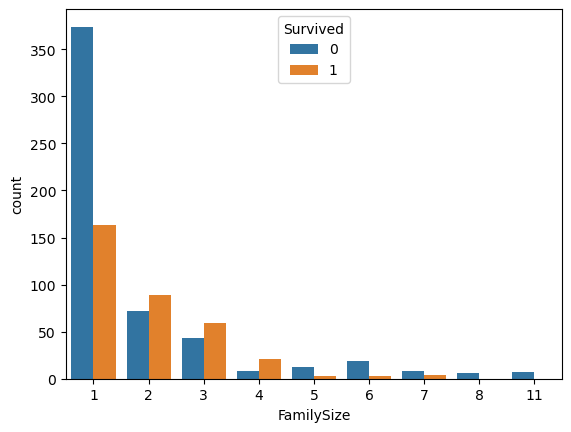

In [47]:
pd.pivot_table(train, index='FamilySize', values='Survived')
sns.countplot(x='FamilySize', hue='Survived', data=train)

In [48]:
drop_list = ['SibSp', 'Parch']
for data in data_list:
    data.drop(drop_list, inplace=True, axis=1)

In [49]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

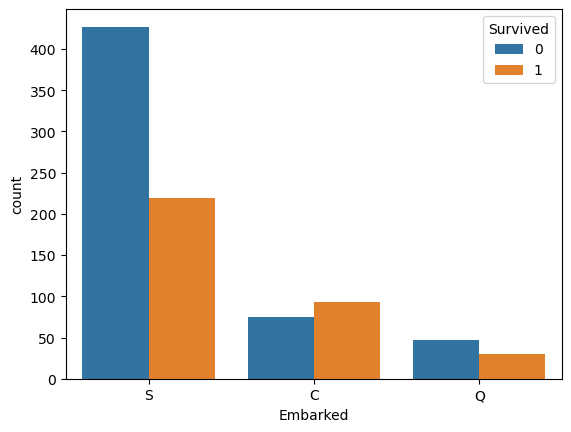

In [50]:
for data in data_list:
    data['Embarked'] = data['Embarked'].fillna('S')

sns.countplot(data=train, x='Embarked', hue='Survived')

In [51]:
em_mapping = {'S':0, 'C':1, 'Q':2}

for data in data_list:
    data['Embarked'] = data['Embarked'].map(em_mapping)

In [52]:
train['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [53]:
for data in data_list:
    data['Cabin'] = data['Cabin'].fillna('N')
    data['Cabin'] = data['Cabin'].apply(lambda x:x[0])
    data['Cabin'] = data['Cabin'].astype('category').cat.codes

train.head()

# 결측치 -> N으로 처리, 기존 Cabin의 맨 앞자리의 알파벳을 카테고리화

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title_name,FamilySize
0,1,0,3,1,1.0,A/5 21171,7.2500,7,0,2,2
1,2,1,1,0,2.0,PC 17599,71.2833,2,1,3,2
2,3,1,3,0,1.0,STON/O2. 3101282,7.9250,7,0,1,1
3,4,1,1,0,2.0,113803,53.1000,2,0,3,2
4,5,0,3,1,2.0,373450,8.0500,7,0,2,1


In [54]:
# Fare 범주화
for data in data_list:
    data['FareRange'] = pd.cut(data['Fare'], 4)

train[['FareRange', 'Survived']].groupby('FareRange').mean()

,Survived
FareRange,
"(-0.512, 128.082]",0.368113
"(128.082, 256.165]",0.724138
"(256.165, 384.247]",0.666667
"(384.247, 512.329]",1.000000


In [55]:
for data in data_list:
    data.loc[data['Fare'] <= 128, 'Fare'] = 0
    data.loc[(data['Fare'] > 128) & (data['Fare'] <= 256), 'Fare'] = 1
    data.loc[(data['Fare'] > 256) & (data['Fare'] <= 384), 'Fare'] = 2
    data.loc[data['Fare'] > 384, 'Fare'] = 3

train.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title_name,FamilySize,FareRange
0,1,0,3,1,1.0,A/5 21171,0.0,7,0,2,2,"(-0.512, 128.082]"
1,2,1,1,0,2.0,PC 17599,0.0,2,1,3,2,"(-0.512, 128.082]"
2,3,1,3,0,1.0,STON/O2. 3101282,0.0,7,0,1,1,"(-0.512, 128.082]"
3,4,1,1,0,2.0,113803,0.0,2,0,3,2,"(-0.512, 128.082]"
4,5,0,3,1,2.0,373450,0.0,7,0,2,1,"(-0.512, 128.082]"


In [56]:
for data in data_list:
    data.drop('FareRange', axis=1, inplace=True)

In [58]:
data_list.head()

AttributeError: 'list' object has no attribute 'head'

In [59]:
data_list[1].head()

,PassengerId,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title_name,FamilySize
0,892,3,1,2.0,330911,0.0,7,2,3,1
1,893,3,0,2.0,363272,0.0,7,0,4,2
2,894,2,1,3.0,240276,0.0,7,2,3,1
3,895,3,1,1.0,315154,0.0,7,0,3,1
4,896,3,0,1.0,3101298,0.0,7,0,4,3


In [60]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title_name,FamilySize
0,1,0,3,1,1.0,A/5 21171,0.0,7,0,2,2
1,2,1,1,0,2.0,PC 17599,0.0,2,1,3,2
2,3,1,3,0,1.0,STON/O2. 3101282,0.0,7,0,1,1
3,4,1,1,0,2.0,113803,0.0,2,0,3,2
4,5,0,3,1,2.0,373450,0.0,7,0,2,1


In [ ]:
data_list[0].head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title_name,FamilySize
0,1,0,3,1,1.0,A/5 21171,0.0,7,0,2,2
1,2,1,1,0,2.0,PC 17599,0.0,2,1,3,2
2,3,1,3,0,1.0,STON/O2. 3101282,0.0,7,0,1,1
3,4,1,1,0,2.0,113803,0.0,2,0,3,2
4,5,0,3,1,2.0,373450,0.0,7,0,2,1


In [61]:
data_list[0].drop('AgeRange', axis=1, inplace=True)

KeyError: "['AgeRange'] not found in axis"

In [62]:
drop_list=['PassengerId', 'Ticket']
for data in data_list:
    data.drop(drop_list, axis=1, inplace=True)

In [63]:
for data in data_list:
    data.drop('Cabin', axis=1, inplace=True)

In [64]:
test[test['Fare'].isnull()]=test['Fare'].mean()

In [65]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title_name,FamilySize
0,0,3,1,1.0,0.0,0,2,2
1,1,1,0,2.0,0.0,1,3,2
2,1,3,0,1.0,0.0,0,1,1
3,1,1,0,2.0,0.0,0,3,2
4,0,3,1,2.0,0.0,0,2,1


In [66]:
test.head()

,Pclass,Sex,Age,Fare,Embarked,Title_name,FamilySize
0,3.0,1.0,2.0,0.0,2.0,3.0,1.0
1,3.0,0.0,2.0,0.0,0.0,4.0,2.0
2,2.0,1.0,3.0,0.0,2.0,3.0,1.0
3,3.0,1.0,1.0,0.0,0.0,3.0,1.0
4,3.0,0.0,1.0,0.0,0.0,4.0,3.0


In [67]:
train.corr()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title_name,FamilySize
Survived,1.000000,-0.338481,-0.543351,-0.043800,0.147466,0.106811,-0.052471,0.016639
Pclass,-0.338481,1.000000,0.131900,-0.358769,-0.298580,0.045702,-0.195910,0.065997
Sex,-0.543351,0.131900,1.000000,0.070220,-0.114771,-0.116569,0.040484,-0.200988
Age,-0.043800,-0.358769,0.070220,1.000000,0.063220,-0.051334,0.427999,-0.217063
Fare,0.147466,-0.298580,-0.114771,0.063220,1.000000,0.047596,-0.044644,0.098769
Embarked,0.106811,0.045702,-0.116569,-0.051334,0.047596,1.000000,-0.081928,-0.080281
Title_name,-0.052471,-0.195910,0.040484,0.427999,-0.044644,-0.081928,1.000000,-0.207530
FamilySize,0.016639,0.065997,-0.200988,-0.217063,0.098769,-0.080281,-0.207530,1.000000


In [68]:
# 모델링

In [69]:
train_input = train.drop('Survived', axis=1).values
train_target = train['Survived'].values
print(train_input.shape, train_target.shape)

(891, 7) (891,)


In [70]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

/Users/a.../opt/anaconda3/lib/python3.9/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [71]:
# KNN
model = KNeighborsClassifier()

In [72]:
score = cross_validate(model, train_input, train_target, return_train_score=True, n_jobs=-1, cv=StratifiedKFold())

print(np.mean(score['train_score']), np.mean(score['test_score']))

0.8361394330018754 0.80023225158496


In [73]:
model = DecisionTreeClassifier()
score = cross_validate(model, train_input, train_target,
                      return_train_score=True, n_jobs=-1,
                      cv = StratifiedKFold())
print(np.mean(score['train_score']), np.mean(score['test_score']))
# 0.872335203366059 0.8024982738057874

0.872335203366059 0.8024919967359236


In [74]:
model = RandomForestClassifier()
score = cross_validate(model, train_input, train_target,
                      return_train_score=True, n_jobs=-1,
                      cv = StratifiedKFold())
print(np.mean(score['train_score']), np.mean(score['test_score']))

0.872335203366059 0.8047517418868871


In [75]:
model = GradientBoostingClassifier()
score = cross_validate(model, train_input, train_target,
                      return_train_score=True, n_jobs=-1,
                      cv = StratifiedKFold())
print(np.mean(score['train_score']), np.mean(score['test_score']))

0.8555009691602187 0.8204632477559475


In [76]:
model = HistGradientBoostingClassifier()
score = cross_validate(model, train_input, train_target,
                      return_train_score=True, n_jobs=-1,
                      cv = StratifiedKFold())
print(np.mean(score['train_score']), np.mean(score['test_score']))

0.8597093307278945 0.8126043562864854


In [77]:
model = GaussianNB()
score = cross_validate(model, train_input, train_target,
                      return_train_score=True, n_jobs=-1,
                      cv = StratifiedKFold())
print(np.mean(score['train_score']), np.mean(score['test_score']))

0.8117284145169169 0.812560416797439


In [78]:
model = SVC()
score = cross_validate(model, train_input, train_target,
                      return_train_score=True, n_jobs=-1,
                      cv = StratifiedKFold())
print(np.mean(score['train_score']), np.mean(score['test_score']))

0.8366992609168413 0.8349946644906158


In [79]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(train_input, train_target)
test_input = test.values
pred = model.predict(test_input)



array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,

In [81]:
pred_acc = round(model.score(train_input, train_target) * 100, 2)

In [82]:
pred_acc

83.73